The goal to to implement, train, and evaluate a neural network that solves the XOR problem.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## XOR problem

In [2]:
x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = np.array([[0.0], [1.0], [1.0], [0.0]])
x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)

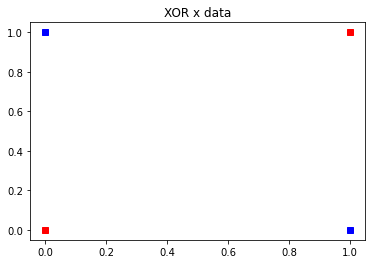

In [3]:
def plot_xor(x):
    plt.plot([x[0, 0], x[3, 0]], [x[0, 1], x[3, 1]], 'rs')
    plt.plot([x[1, 0], x[2, 0]], [x[1, 1], x[2, 1]], 'bs')
    plt.title('XOR x data')
    plt.show()
plot_xor(x)

## depth-2 NN

### Build the model

In [4]:
xor_network = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu',use_bias=False, kernel_initializer=tf.random_normal_initializer(seed=100, stddev=0.1), dtype='float32'),
    tf.keras.layers.Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(seed=100, stddev=0.1), dtype='float32'),
])

Note the restriction applied to initialization - if y_hat is too much, then the log in loss will go to infinity. We need y_hat between -1 and 1, and then use sigmoid to make it in [0,1].

### Implement the loss

In [5]:
def cross_entropy(y, y_hat):
    loss = 0
    m = y.shape[0]
    for i in range(m):
        if y[i] == 1.0:
            loss += -tf.math.log(y_hat[i])
        else:
            loss += -tf.math.log(1.0 - y_hat[i])
    m = tf.cast(m, tf.float32)
    return loss / m

### Select an optimizer

In [6]:
optimiser = tf.optimizers.SGD(learning_rate=1e-1)

## Training NN

In [7]:
epochs = 100
loss_list = []
for iter in range(epochs):
    with tf.GradientTape() as tape: 
        y_hat = xor_network(x, training=True)
        y_predict = tf.nn.sigmoid(y_hat)
        loss = cross_entropy(y, y_predict) 
    grads = tape.gradient(loss, xor_network.trainable_variables) 
    optimiser.apply_gradients(zip(grads, xor_network.trainable_variables)) 
    loss_list.append(loss)

Text(0.5, 1.0, 'Loss')

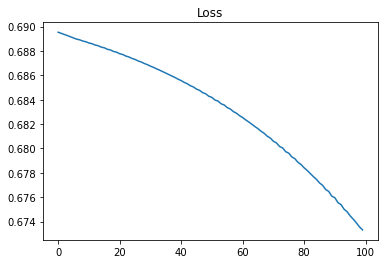

In [8]:
plt.plot(loss_list)
plt.title('Loss')